In [ ]:
# This tutorial is based on the tutorial section of the brian software:
# https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html

# We first need to install Brian2.
# The "!" allows you to execute a command outside of the python environment. 
# It basically runs this command in the terminal of your Colab machine.
!pip install brian2

# Let's now import the Brian modlue. 
# With "import *", we import everything. 
from brian2 import *

# for more beautiful plots
import seaborn as sns
sns.set()

**Note:** using `import *` is considered a bad coding practice because different modules may have classes or functions carrying the same name. Try to avoid it whenever possible. In this notebook, it saves you from writing `brian2.` over and over again.

---


The sturcture of this Colab notebook is as follows. In the first part "A basic neural network" we expose you to the Brian2 python module and show you how you can build a simple neural network. 
After you have understood the basic usage, we provide you with three exercises where you can practice your codings skills and test your understanding. 



1.   Exercise: You will adapt the code to work with SI units.
2.   Exercise: You will implement the Izhikevich neuron and explore its modelling capabilities.
3.   Exercise: You will model a STDP synapses with local variables.

Let's begin.



# A very basic neural network

### 1. Initialize the experiment

First we want to consider a very basic neural network.
To begin, we first need to open our simulation environment.

In [ ]:
start_scope()

### 2. Define the neuron model

We want to specify a point neuron model describing the behaviour. We will use the leaky integrate and fire (LIF) neuron in a slightly simplified version. Try to describe why this a little bit simpler than the version that you have seen in exercise 03. 

In [ ]:
eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

Maybe you have figured it out by yourself:

*   We neglected the resistance, e.g. $R=1$
*   We identified $V=A=\Omega=1$, which means that we are working without units.

**Generally, we can use a simple conventional math syntax to define how a neuron behaves. The only difference occurs at the end of each line because we have to specify the unit with ": UNIT" at the end of each line.** Brian is sensible to units in the sense that if you try to add two numbers with different neurons it will fail. Note that $d/dt$ is associated with an inverse time dimension, which is why we have to define `tau : second`.



### 3. Initialize a set of neurons

Let's now continue by setting up a group of three neurons that obey the previously defined eqation. We want the LIF neuron to spike when the voltage $v$ is larger than $1$ and set the voltage to zero after emitting the spike. Brian allows you to run different methods for solving the system of differential equations. Here, we want to choose "exact" although other options would work here equally fine. 

The three neurons receive different input currents, e.g. 2, 0 and 0 ampere for the first, second and third neuron, respectively. Furthermore, the neurons behave with different time constants $\tau$. In brian2 code:

In [ ]:
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

### 4. Connecting the neurons with synapses

Now that we have defined three neurons, let's connect them to each other with synapses. Let us paraphrase us what happens. Connecting the neurons means nothing but connecting the neuron group G with G itself. As typcially for LIF neurons, we simply add a certain value (here $w$) to the post-synaptic potential once the pre-synaptic neuron spikes. 

We want to be a little more specific, namely we want to connect the first to the second and third neuron. The weights are given as $w_{pre,post}$ so we use the second line to tell Brian2 to establish the connections $w_{0,1}$ and $w_{0,2}$.

The last two lines model two properties of a synapse. We consider the synaptic strength, e.g. the weigth, and the synaptic delay. So far you may not have encountered the delay but it is used to model the different distances that arise due to different lengths of dendrites and axons. Note how we can use the labels $j$ to modify the values!


In [ ]:
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'
S.delay = 'j*2*ms'

With these couple of lines of code, we have already defined our network of LIF neurons! We now want to simualate the network. 

### 5. Monitoring the membrane potential.

However, to see what's happening during the simulation, we need to keep track of the voltages $v_i(t), i \in \{1,2,3\}$. Brian2 offers a very nice feature called StateMonitor. We can use it to monitor the population G by recording the voltage. 

In [ ]:
M = StateMonitor(G, 'v', record=True)

### 6. Simulate the system 
Let us now simulate the network for 50 milli-seconds

In [ ]:
run(50*ms)

and visualize the results with Brians integrated matplotlib API.

In [ ]:
plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

We charge neuron 0 with a constant, non-zero current $I_0$. We observe the curve that we also saw in exercise 03 - the typical curve that describes the charging of a capacitor in the RC circuit. For neuron 1 and 2 we do not see this curve. For these two neurons, we set $I_1=I_2=0$. In that sense, we see the curve that we observe when discharging a capacior. 

Whenever neuron 0 spikes, it takes a small time ($j\cdot 2 \text{ms}$) modeled by the synaptic delay until neuron 1 and 2 increase their membrane potential by 0.2 and 0.4, respectively. Generally, a neuron fires whenever its membrane potential crosses the threshold 1.0 and the potential is set to 0.



---



## Task 1:
You have now seen the basic syntax for Brian2. The example slightly deviates from the LIF neurons we have seen in exercise 03 because we do not use any units. The following codeblock is identical to the code that you have seen so far. Make the necessary changes to describe the LIF neuron $\frac{dv}{dt}=\frac{1}{\tau}(R \cdot I-v)$ with the appropriate SI units. Choose the parameters such that you recover the same plot as above. 

In [ ]:
# start experiment
start_scope()

# define neuron model
# ***TO DO***: include R; modify units to amp, volt, ohm
eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

# define the neuron group and its parameters
# ***TO DO***: set values for R; modify units accordingly
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# define the synapses to specify the connections
# ***TO DO***: modify units
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'
S.delay = 'j*2*ms'

# monitor the voltage
M = StateMonitor(G, 'v', record=True)

# run simulation
run(50*ms)

# visualize results
plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v in volt')
legend();

## Solution 1

In [ ]:
# start experiment
start_scope()

# define neuron model
eqs = '''
dv/dt = (R*I-v)/tau : volt
R : ohm
I : amp
tau : second
'''

# define the neuron group and its parameters
G = NeuronGroup(3, eqs, threshold='v>1*volt', reset='v = 0*volt', method='exact')
G.R = [1, 1, 1]*ohm
G.I = [2, 0, 0]*amp
G.tau = [10, 100, 100]*ms

# define the synapses to specify the connections
S = Synapses(G, G, 'w : volt', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2*volt'
S.delay = 'j*2*ms'

# monitor the voltage
M = StateMonitor(G, 'v', record=True)

# run simulation
run(50*ms)

# visualize results
plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v in volt')
legend();



---



---



# Task 2

In exercise 03, you have encountered the Hodgkin-Huxley model. We told you that there are many models which are based on it. One of them is the so called Izhikevich neuron which was introduced in this [paper](https://www.izhikevich.org/publications/spikes.pdf). The Izhikevich neuron can produce complicated spiking behaviour based on two coupled differential equations

![Image taken from Izhikevich's homepage.](https://www.izhikevich.org/publications/izhik.gif)

Although the equations can be seen in the figure, we note them down here explicitly. The neuron is decribed by two dimensionless variables $u,v$ evolving according to 
\begin{align}
\frac{dv}{dt} &= 0.04 v^2 + 5 v + 140 - u + I \ , \\
\frac{du}{dt} &= a(bv-u) \ ,
\end{align}
where $a,$ and $b$ are dimensionless parameters. According to Izhikevich, the variable $v$ describes the membrane potential and the variable $u$ describes a membrane recovery variable. $I$ is the electrical current which is also dimensionless.

When the membrane potential reaches a threshold at timestep $t_n$, e.g. $v(t_n) \geq 30$, then
\begin{equation}
v(t_{n+1}) = c \ \ \ \text{and} \ \ \ u(t_{n+1}) = u(t_n) + d \ .
\end{equation}
Here, $c$ and $d$ are dimensionless parameters. 

By choosing suitable parameters for the differential equations and the reset mechanism, we can produce all of the above cases. The values for the parameters are given in the two top right pictures. To save you the burden of reading off these values, we provide them in a dictionary.


In [ ]:
izhikevich_parameters = {'RS'  : {'a':0.02, 'b':0.2,  'c':-65, 'd':8   }, 
                         'IB'  : {'a':0.02, 'b':0.2,  'c':-55, 'd':4   },
                         'CH'  : {'a':0.02, 'b':0.2,  'c':-50, 'd':2   },
                         'FS'  : {'a':0.1,  'b':0.2,  'c':-65, 'd':2   }, 
                         'TC'  : {'a':0.02, 'b':0.25, 'c':-65, 'd':0.05}, 
                         'RZ'  : {'a':0.1,  'b':0.26, 'c':-65, 'd':2   },
                         'LTS' : {'a':0.02, 'b':0.25, 'c':-65, 'd':2   }}

**Your task: Implement the Izhikevich neuron with Brian2.** You may take as much as you want from the previous code snippets. Note that you only need a single neuron and no sysnapses for this exercise


1.   Start by defining the equations for the variables and the reset mechanism. Make sure that the dimensions are set correctly. (Hint: define all parameters in the neuron equations an reuse them in the reset equation)
2.   So far we have used the *exact* method to simulate the neuron group. Here, we want you to use *euler*'s method.
3.   Set the parameters based on the dictionary. The current should be $I=10$.
4.   Use a *StateMonitor* to monitor the variables $v,u$.
5.   Run the simulation for 200 ms.
6.   Visualize the variables $v,u$ over the simulation time period.   
7.   (Optional) Visualize the phase plane ($v,u$) together with the trajectory ($v(t),u(t)$).
8.   (**Mandatory**!) Test you implementation by trying to produce the spike patterns RS, FS, CH, IB, and TC.

We highly recommend typing everything and don't just copy paste. Even if you just type it, you'll learn significantly more. Also we would encourage you to try it without the code skeleton. In case you have trouble, you can find a code skeleton below.



In [ ]:
#
# your implementation of an Izhikevich neuron with Brian2
#

# A code skeleton
(for those who need some guidance)

In [ ]:
# define a variable case to choose the different cases 
# you may get parameter a with izhikevich_parameters[case]['a']
# for b,c,d, it is the same
case = 'CH'

# start experiment
start_scope()

# define neuron model
eqs = '''
TO DO
'''

# define reset
eq_reset ='''
TO DO
'''

# define the neuron group and its parameters
G = NeuronGroup(1, eqs, threshold='TO DO', reset=eq_reset, method='TO DO')
#
# TO DO: define parameters
#

# monitor the voltage
M = StateMonitor(G, 'TO DO', record=True)

# run simulation
run(200*ms)

# visualize results
plot(M.t/ms, M.v[0], label='Neuron 0')
xlabel('Time (ms)')
ylabel('v in volt')
legend()
show()
#
# TO DO: plot u against time
#

# Solution 2

In [ ]:
case = 'CH'

# start experiment
start_scope()

# define neuron model
eqs = '''
dv/dt = (0.04*v**2+5*v+140-u+I)/T : 1
du/dt = a*(b*v-u) : 1
T : second
I : 1
a : hertz
b : 1
c : 1
d : 1
'''

eq_reset ='''
v = c
u = u + d
'''

# define the neuron group and its parameters
G = NeuronGroup(1, eqs, threshold='v>30', reset=eq_reset, method='euler')
G.a = izhikevich_parameters[case]['a']*kHz
G.b = izhikevich_parameters[case]['b']
G.c = izhikevich_parameters[case]['c']
G.d = izhikevich_parameters[case]['d']
G.I = 10
G.T = 1*ms
G.v = -63
G.u = -20

# monitor the voltage
M = StateMonitor(G, True, record=True)

# run simulation
run(200*ms)

# visualize results
plot(M.t/ms, M.v[0], label='Neuron 0')
xlabel('Time (ms)')
ylabel('v in volt')
legend()
show()
plot(M.t/ms, M.u[0], label='Neuron 0')
xlabel('Time (ms)')
ylabel('u')
legend()
show()

# Optional: phase plane 
def f(v,u):
  a = izhikevich_parameters[case]['a']*10
  b = izhikevich_parameters[case]['b']
  return ((0.04*v**2+5*v+140-u+10), a*(b*v-u))

x = np.linspace(-70,20,20)
y = np.linspace(np.min(M.u[0]),np.max(M.u[0]),15)

X,Y = np.meshgrid(x,y)

xx, yy = np.zeros(X.shape), np.zeros(Y.shape)

for i,j in np.ndindex(X.shape):
  res = f(X[i,j],Y[i,j])
  xx[i,j] = res[0]
  yy[i,j] = res[1]

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
Q1 = plt.quiver(X,Y,xx,np.zeros_like(yy),color='r')
Q1 = plt.quiver(X,Y,np.zeros_like(xx),yy,color='g')

plot(M.v[0], M.u[0], label='Neuron 0',alpha=0.5,marker='o',markersize = 4)
xlabel('v')
ylabel('u')
title('phase plane analysis')
legend()
show()

Here, we decided to split up the components of the vector field $\frac{d}{dt}(v,u)$ because the first component grows very large (spiking). This makes it very hard to see the different components of the field because the large values at one point dwarf the values at another point. The downside with the current representation is that it breaks the scale between the two derivatives. Generally, the sum of the two arrows should be tangent to the blue line.

Typically, one would rather use Mathematica or similar software  for such a task.

# Task 3

Now that you have seen how to use Brian2 to build simple networks with synapses and different neuron models, we want to implement STDP based on the equations that you derived last time. Recall that both, pre- and postsynaptic, spikes leave a trace in the synapse. They are modeled according to
\begin{align}
\tau_{pre} \frac{d}{dt}a_{pre} &= - a_{pre} \ , \\
\tau_{post} \frac{d}{dt}a_{post} &= - a_{post} \ . \\
\end{align}

When a pre-synaptic spike arrives at the synapse, the trace and the weight are updated
\begin{align}
a_{pre} \rightarrow a_{pre} + A_{pre} \ , \\
w \rightarrow w + a_{post} \ .
\end{align}

When a post-synaptic spike arrives, we update
\begin{align}
a_{post} \rightarrow a_{post} + A_{post} \ , \\
w \rightarrow w + a_{pre}
\end{align}

You may express these equations for Brian2 as

In [ ]:
taupre = taupost = 20*ms
Apre = 0.01
Apost = -Apre
tmax = 50*ms
N = 100

model_A = '''
          w : 1
          dapre/dt = -apre/taupre : 1 (event-driven)
          dapost/dt = -apost/taupost : 1 (event-driven)
          '''
model_B = '''
          apre += Apre
          w = w+apost
          '''

model_C = '''
          apost += Apost
          w = w+apre
          '''

Go through the following code and place `model_A`, `model_B`, and `model_C` at the appropriate positions in the Synapse class. You probably have to check Brian2's user guide for that.

Try to explain in your own words what the code does and how it relates to the previous exercise (exercise 04 - local variables for stdp).

In [ ]:
start_scope()

G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*tmax/(N-1)'
H.tspike = '(N-1-i)*tmax/(N-1)'

S = Synapses(G, H,# TO DO: place models here.)
S.connect(j='i')

run(tmax+1*ms)

plot((H.tspike-G.tspike)/ms, S.w)
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k');

# Solution 3

WARNING    "i" is an internal variable of group "neurongroup_4", but also exists in the run namespace with the value 14. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "i" is an internal variable of group "neurongroup_5", but also exists in the run namespace with the value 14. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "i" is an internal variable of group "synapses", but also exists in the run namespace with the value 14. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


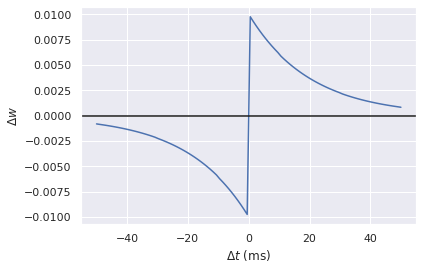

In [ ]:
start_scope()

# Presynaptic neurons G spike at times from 0 to tmax
# Postsynaptic neurons G spike at times from tmax to 0
# So difference in spike times will vary from -tmax to +tmax
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*tmax/(N-1)'
H.tspike = '(N-1-i)*tmax/(N-1)'

S = Synapses(G, H,model=model_A,on_pre=model_B,on_post=model_C)
S.connect(j='i')

run(tmax+1*ms)

plot((H.tspike-G.tspike)/ms, S.w)
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k');

The code sample provides the numeric proof of last weeks exercise. The spike times of the pre- and post-synaptic neurons are arranged such that they span the time $-t_{max} < \Delta t < t_{max}$. We plot the weight changes in the network against the time difference and find the function 
\begin{equation}
W(\Delta t) =
\begin{cases}
A_{pre} e^{-\Delta t  \tau_{pre} }    & \Delta t > 0 \\ 
A_{post} e^{\Delta t  \tau_{post}  }  & \Delta t < 0
\end{cases}
\end{equation}
which we modeled with the local variables in the first place. 